In [0]:
# !unzip -uq "drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest-xray-pneumonia(1).zip" -d "drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919"


# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
import os, os.path
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import class_weight
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, SeparableConv2D, Activation
from keras import backend as K
from keras.preprocessing import image
from keras import optimizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.image import load_img




In [0]:

# def image_aug():

#     from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#     from glob import glob 
#     from pathlib import Path
#     import random 
#     import os 

#     #selection our imagae director 
#     data_dir = Path('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray')

#     train_dir = data_dir / 'train'
#     train_normal_cases_dir = Path('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/train/NORMAL')
#     train_normal_cases = train_normal_cases_dir.glob('*.jpeg')
#     train_data = []

#     # Go through all the normal cases. The label for these cases will be 0
#     for img in train_normal_cases:
#         train_data.append((img,0))


#     #Generate a random selection
#     image_path = random.choice(train_data)

#     #instantiate a datagenerator withc criteria for randomizing output
#     datagen = ImageDataGenerator(
#         #rescale=1./255,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         data_format = 'channels_last',
#         fill_mode='nearest')

#     #loading an image from random image path
#     img = load_img(image_path[0])

#     #turning into an array
#     x = img_to_array(img)

#     #turning it 4 dimensional 
#     x = x.reshape((1,)+ x.shape)

#     #create random images 

#     i = 0

#     for batch in datagen.flow(x, batch_size=1,
#                              save_to_dir='/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/train/NORMAL', save_prefix='normal_aug', save_format='jpeg'):
#         i += 1
#         if i > 20:
#             break

In [0]:


# from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from glob import glob 
# from pathlib import Path
# import random 
# import os 

# #selection our imagae director 
# data_dir = Path('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray')

# train_dir = data_dir / 'train'
# train_normal_cases_dir = Path('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/train/NORMAL')
# train_normal_cases = train_normal_cases_dir.glob('*.jpeg')
# train_temp = []

# # Go through all the normal cases. The label for these cases will be 0
# for img in train_normal_cases:
#     train_temp.append((img,0))

# for i in range(125):
#   #Generate a random selection
#   image_path = random.choice(train_temp)

#   #instantiate a datagenerator withc criteria for randomizing output
#   datagen = ImageDataGenerator(
#       #rescale=1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       data_format = 'channels_last',
#       fill_mode='nearest')

#   #loading an image from random image path
#   img = load_img(image_path[0])

#   #turning into an array
#   x = img_to_array(img)

#   #turning it 4 dimensional 
#   x = x.reshape((1,)+ x.shape)

#   #create random images 

#   i = 0

#   for batch in datagen.flow(x, batch_size=1,
#                             save_to_dir='/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/train/NORMAL', save_prefix='normal_aug', save_format='jpeg'):
#       i += 1
#       if i > 20:
#           break

In [0]:
# Define path to the data directory
data_dir = Path('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)

train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [0]:

train_normal_cases_dir = train_dir / 'NORMAL'
train_pneumonia_cases_dir = train_dir / 'PNEUMONIA'


train_normal_cases = train_normal_cases_dir.glob('*.jpeg')
train_pneumonia_cases = train_pneumonia_cases_dir.glob('*.jpeg')


# Test data too
test_normal_cases_dir = test_dir / 'NORMAL'
test_pneumonia_cases_dir = test_dir / 'PNEUMONIA'

test_normal_cases = test_normal_cases_dir.glob('*.jpeg')
test_pneumonia_cases = test_pneumonia_cases_dir.glob('*.jpeg')

#val
val_normal_cases_dir = val_dir / 'NORMAL'
val_pneumonia_cases_dir = val_dir / 'PNEUMONIA'

val_normal_cases = val_normal_cases_dir.glob('*.jpeg')
val_pneumonia_cases = val_pneumonia_cases_dir.glob('*.jpeg')



In [5]:

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in train_normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in train_pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_df = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_df = train_df.sample(frac=1.).reset_index(drop=True)

# Create column for read ability
train_df["label_name"] = ["pneumonia" if label  == 1 else "normal" for label in train_df["label"]]


# How the dataframe looks like?
train_df.head()



,image,label,label_name
0,/content/drive/My Drive/dsc-mod-4-project-v2-1...,1,pneumonia
1,/content/drive/My Drive/dsc-mod-4-project-v2-1...,1,pneumonia
2,/content/drive/My Drive/dsc-mod-4-project-v2-1...,0,normal
3,/content/drive/My Drive/dsc-mod-4-project-v2-1...,0,normal
4,/content/drive/My Drive/dsc-mod-4-project-v2-1...,0,normal


In [6]:
train_df.label.value_counts()

1    3875
0    3639
Name: label, dtype: int64

In [7]:
# An empty list. We will insert the data into this list in (img_path, label) format
test_data = []

# Go through all the normal cases. The label for these cases will be 0


for img in test_normal_cases:
  test_data.append((str(img).lstrip('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/test/'),0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in test_pneumonia_cases:
    test_data.append((str(img).lstrip('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/test/'),1))

# Get a pandas dataframe from the data we have in our list 
test_df = pd.DataFrame(test_data, columns=['image', 'label'],index=None)

# Shuffle the data 
test_df = test_df.sample(frac=1.).reset_index(drop=True)

# Create column for read ability
test_df["label_name"] = ["pneumonia" if label  == 1 else "normal" for label in test_df["label"]]


# How the dataframe looks like?
test_df.head()



,image,label,label_name
0,PNEUMONIA/person139_bacteria_662.jpeg,1,pneumonia
1,PNEUMONIA/person155_bacteria_731.jpeg,1,pneumonia
2,PNEUMONIA/person152_bacteria_722.jpeg,1,pneumonia
3,PNEUMONIA/person101_bacteria_486.jpeg,1,pneumonia
4,NORMAL/NORMAL2-IM-0350-0001.jpeg,0,normal


In [8]:
# An empty list. We will insert the data into this list in (img_path, label) format 
val_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in val_normal_cases:
    val_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in val_pneumonia_cases:
    val_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
val_df = pd.DataFrame(val_data, columns=['image', 'label'],index=None)

# Shuffle the data 
val_df = val_df.sample(frac=1.).reset_index(drop=True)

# Create column for read ability
val_df["label_name"] = ["pneumonia" if label  == 1 else "normal" for label in val_df["label"]]


# How the dataframe looks like?
val_df.head()



,image,label,label_name
0,/content/drive/My Drive/dsc-mod-4-project-v2-1...,0,normal
1,/content/drive/My Drive/dsc-mod-4-project-v2-1...,1,pneumonia
2,/content/drive/My Drive/dsc-mod-4-project-v2-1...,1,pneumonia
3,/content/drive/My Drive/dsc-mod-4-project-v2-1...,0,normal
4,/content/drive/My Drive/dsc-mod-4-project-v2-1...,0,normal


In [9]:
# Checking the len of normal and pnemonia images we have

print("Training Normal:", len(train_df.loc[train_df['label'] == 0]))
print("Training Pneumonia:", len(train_df.loc[train_df['label'] == 1]), '\n')


print("Test Normal:", len(test_df.loc[test_df['label'] == 0]))
print("Test Pneumonia:", len(test_df.loc[test_df['label'] == 1]), '\n')


Training Normal: 3639
Training Pneumonia: 3875 

Test Normal: 234
Test Pneumonia: 390 



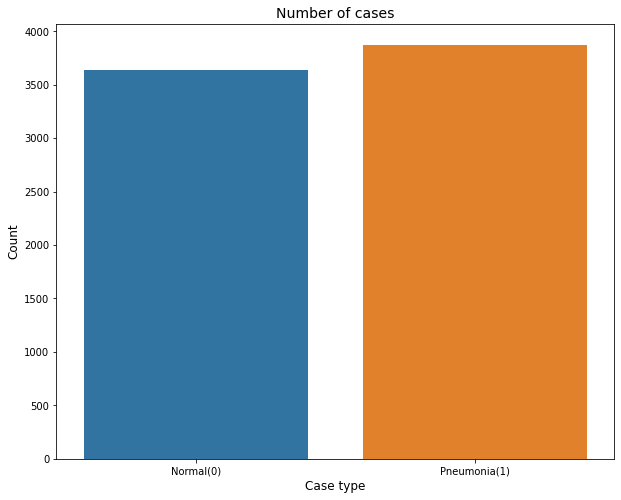

In [10]:
cases_count = train_df['label'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.3, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
## Pneumonia
# for i in train_data[-7:-1]:
#   show_img(i[0])

In [0]:
## Normal
# for i in train_data[:6]:
#   show_img(i[0])

In [73]:
train_data[0][0]

PosixPath('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/train/NORMAL/normal_aug_0_5089.jpeg')

In [0]:
def show_img(image_path):
  img = np.random.rand(224,224,3)
  img_path = image_path
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.figure(figsize=(8,8))
  plt.imshow(x/255.)
  plt.show()

In [0]:
import cv2
import glob

No Pneumonia


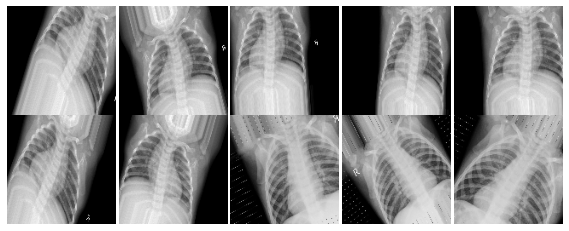

In [110]:
print("No Pneumonia")
multipleImages = glob.glob('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Pneumonia


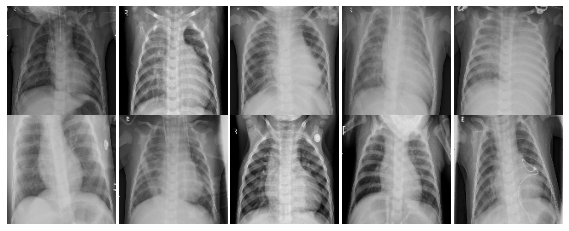

In [114]:
print("Pneumonia")
multipleImages = glob.glob('/content/drive/My Drive/dsc-mod-4-project-v2-1-online-ds-ft-120919/chest_xray/chest_xray/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [12]:
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,

        # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    # target_size=(240, 240),
    # batch_size=16,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    # target_size=(240, 240),
    # batch_size=16,
    class_mode='binary')




Found 7514 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
model_1 = Sequential()
model_1.add(Conv2D(8,(4,4),activation='relu', input_shape=(256, 256, 3)))
model_1.add(MaxPooling2D((3, 3)))
model_1.add(Conv2D(8, (4, 4), activation='relu'))
model_1.add(MaxPooling2D((3, 3)))
model_1.add(Conv2D(8, (4, 4), activation='relu'))
model_1.add(MaxPooling2D((3, 3)))
model_1.add(Flatten())
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(1, activation='sigmoid'))



In [16]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 253, 253, 8)       392       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 81, 81, 8)         1032      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 8)         1032      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [0]:
# # # opt = optimizers.Adam(lr=0.0001)
opt = optimizers.Adam()
# # es = EarlyStopping(patience=5)
# # chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)


model_1.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [18]:
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 253, 253, 8)       392       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 81, 81, 8)         1032      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 8)         1032      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [19]:
train=model_1.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator) 



Epoch 1/20
235/235 [==============================] - 218s 929ms/step - loss: 0.2983 - acc: 0.8753 - val_loss: 0.6167 - val_acc: 0.7500
Epoch 2/20
235/235 [==============================] - 215s 914ms/step - loss: 0.1524 - acc: 0.9444 - val_loss: 0.5076 - val_acc: 0.8125
Epoch 3/20
235/235 [==============================] - 212s 901ms/step - loss: 0.1123 - acc: 0.9594 - val_loss: 0.5134 - val_acc: 0.8750
Epoch 4/20
235/235 [==============================] - 215s 913ms/step - loss: 0.1023 - acc: 0.9653 - val_loss: 0.6035 - val_acc: 0.8125
Epoch 5/20
235/235 [==============================] - 211s 899ms/step - loss: 0.0946 - acc: 0.9650 - val_loss: 0.4650 - val_acc: 0.8125
Epoch 6/20
235/235 [==============================] - 211s 899ms/step - loss: 0.0815 - acc: 0.9699 - val_loss: 0.2563 - val_acc: 0.9375
Epoch 7/20
235/235 [==============================] - 210s 893ms/step - loss: 0.0814 - acc: 0.9693 - val_loss: 0.3761 - val_acc: 0.7500
Epoch 8/20
235/235 [============================

In [0]:
accuracy=train.history['acc']
val_acc=train.history['val_acc']
loss=train.history['loss']
val_loss=train.history['val_loss']
epochs=list(range(20))


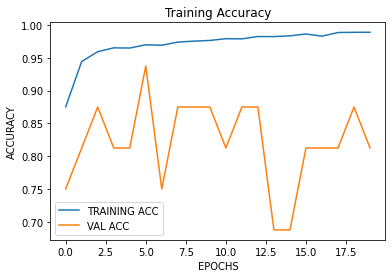

In [38]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy)
plt.title('Training Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(epochs,val_acc)
plt.legend(['TRAINING ACC','VAL ACC'])
plt.show()

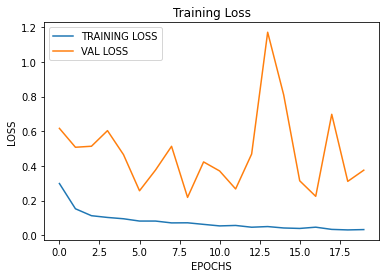

In [37]:
plt.plot(epochs,loss)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(epochs,val_loss)
plt.legend(['TRAINING LOSS','VAL LOSS'])
plt.title('Training Loss')
plt.show()

In [26]:
print("Accuracy : ",accuracy[-1]*100)

Accuracy :  98.90870451927185


In [0]:

p = model_1.predict_generator(test_generator)

pre = pd.DataFrame(p, columns=['predicted_label'])

pre["image"] = test_generator.filenames
# pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre["predicted_arg"] = np.round(pre['predicted_label'])




In [0]:
# pre = pre.rename(columns={'filename':'image', 'label':'predicted_label', 'arg':'predicted_arg'},)

In [0]:
results = pd.merge(test_df, pre, on='image')

In [29]:
results.loc[results['label']!= results['predicted_arg']]

,image,label,label_name,predicted_label,predicted_arg
2,NORMAL/NORMAL2-IM-0007-0001.jpeg,0,normal,1.000000,1.0
6,NORMAL/NORMAL2-IM-0210-0001.jpeg,0,normal,1.000000,1.0
8,NORMAL/IM-0069-0001.jpeg,0,normal,0.992125,1.0
9,PNEUMONIA/person44_virus_93.jpeg,1,pneumonia,0.000570,0.0
12,NORMAL/IM-0071-0001.jpeg,0,normal,0.999549,1.0
...,...,...,...,...,...
612,PNEUMONIA/person1674_virus_2890.jpeg,1,pneumonia,0.051096,0.0
614,NORMAL/IM-0031-0001.jpeg,0,normal,1.000000,1.0
615,NORMAL/IM-0021-0001.jpeg,0,normal,0.999996,1.0
620,NORMAL/IM-0011-0001.jpeg,0,normal,0.999923,1.0


In [0]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score, classification_report, confusion_matrix



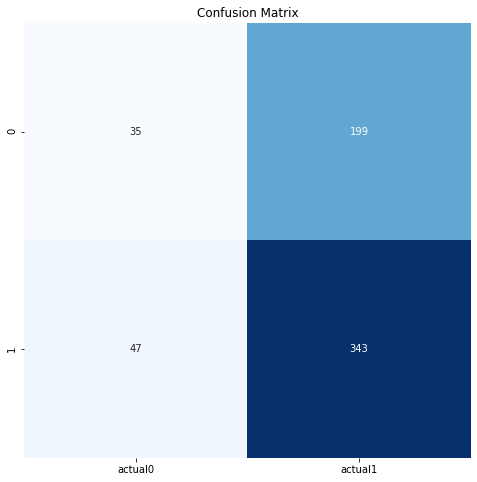

In [35]:
cm = confusion_matrix(results['label'], results['predicted_arg'])
plt.figure(figsize=(8,8))
sns.heatmap(cm, xticklabels=("actual0", "actual1"), cmap="Blues", annot=True, fmt='.3g', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [31]:
test_loss, test_acc = model_1.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7640306353569031


In [32]:
accuracy_score(results['label'], list(results['predicted_arg']))

0.6057692307692307

# Trying same model with cnn

In [0]:
# train_datagen_1 = ImageDataGenerator(rotation_range=40, 
#                                    width_shift_range=0.2, 
#                                    height_shift_range=0.2, 
#                                    shear_range=0.2, 
#                                    zoom_range=0.2, 
#                                    horizontal_flip=True, 
#                                    fill_mode='nearest')


# train_generator_1 = train_datagen_1.flow_from_directory(
#         # This is the target directory
#         train_dir,
#         # All images will be resized to 150x150
#         target_size=(240, 240),
#         batch_size=16,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

# test_datagen_1 = ImageDataGenerator(rescale=1./255)

# test_generator_1 = test_datagen_1.flow_from_directory(test_dir,
#                                                         target_size=(240, 240),
#                                                         batch_size=16,
#                                                         class_mode='binary')


In [0]:
# model_2 = Sequential()

# model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)))
# model_2.add(MaxPooling2D((2, 2)))
# model_2.add(Flatten())
# model_2.add(Dense(128, activation='relu'))
# model_2.add(Dense(1, activation='sigmoid'))

# opt = optimizers.Adam(lr=0.0001)
# es = EarlyStopping(patience=5)
# chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)

# model_2.compile(loss='binary_crossentropy',
#               optimizer=opt,
#               metrics=['acc'])



In [0]:
# history_2 = model_2.fit_generator(train_generator_1,
#                               steps_per_epoch=nb_train_steps, 
#                               epochs=5, 
#                               validation_data=test_generator_1, 
#                               validation_steps=50,
#                               class_weight={0:1, 1:weight_pneu})

# New model with more filters 


In [0]:
# train_datagen_3 = ImageDataGenerator(rotation_range=40, 
#                                    width_shift_range=0.2, 
#                                    height_shift_range=0.2, 
#                                    shear_range=0.2, 
#                                    zoom_range=0.2, 
#                                    horizontal_flip=True, 
#                                    fill_mode='nearest')

# test_datagen_3 = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen_3.flow_from_directory(
#         # This is the target directory
#         train_data_dir,
#         # All images will be resized to 150x150
#         target_size=(150, 150),
#         batch_size=32,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

# test_generator = test_datagen_3.flow_from_directory(test_data_dir, 
#                                                         target_size=(150, 150), 
#                                                         batch_size=32, 
#                                                         class_mode='binary')
# opt = optimizers.Adam()
# model_3.compile(loss='binary_crossentropy',
#               optimizer=opt,
#               metrics=['acc'])

# history_3 = model_3.fit_generator(train_generator, 
#                               steps_per_epoch=100, 
#                               epochs=10, 
#                               validation_data=test_generator, 
#                               validation_steps=50)

In [0]:
# pred_2 = model_2.predict(test_generator)

In [0]:
# test_loss, test_acc = model_2.evaluate_generator(test_generator, steps=50)
# print('test acc:', test_acc)